In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt
data=[]
label=[]
file = open("data.csv", "r")
datas = csv.reader(file)
for line in datas:
    ty=list(map(float, line[:2]))
    la=list(map(int,line[2]))
    #la=list(map(int,la))
    data.append(ty)
    label.append(la)
file.close()
print(np.shape(label))

(500, 1)


In [13]:
labels=np.reshape(np.array(label),(500,))
labels=labels
pos5 = [i for i in range(len(labels)) if labels[i]==5]
pos4 = [i for i in range(len(labels)) if labels[i]==4]
pos3 = [i for i in range(len(labels)) if labels[i]==3]
pos2 = [i for i in range(len(labels)) if labels[i]==2]
pos1 = [i for i in range(len(labels)) if labels[i]==1]

[[-0.747  0.63 ]]


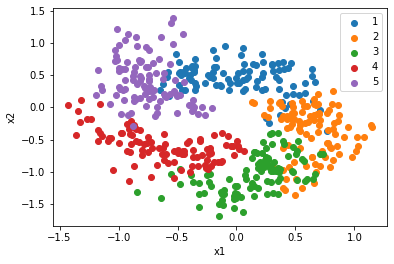

In [14]:
np_data=np.array(data)
print(np_data[[0]])
a,b=np.split(np_data, 2, axis=1)
a=a.flatten()
b=b.flatten()


plt.scatter(a[pos1], b[pos1], label='1')
plt.scatter(a[pos2], b[pos2], label='2')
plt.scatter(a[pos3], b[pos3], label='3')
plt.scatter(a[pos4], b[pos4], label='4')
plt.scatter(a[pos5], b[pos5], label='5')

plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
e = LabelEncoder()
e.fit(label)
label = e.transform(label)
Y_encoded = tf.keras.utils.to_categorical(label)

In [16]:
from sklearn.model_selection import train_test_split
#x_train , x_test , y_train , y_test = train_test_split(np_data, label,test_size=0.01,random_state=42)
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(np_data, Y_encoded, epochs=500, batch_size=25, verbose=0)

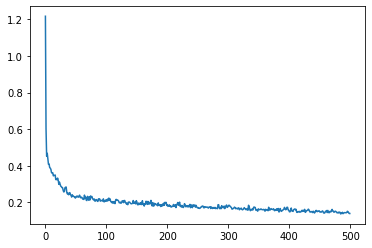

In [17]:
plt.plot(history.history['loss'])

In [22]:
x_test=np.array([[-2,-1],[-1,2],[0,1],[1,0],[0,-2]])
y_test=np.array([3,4,0,1,2])
Z = model.predict(x_test)
z=np.argmax(Z,1)
print(z)
print(y_test)

[3 4 0 1 2]
[3 4 0 1 2]


In [18]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y,orgin_y, classifier, resolution=0.01):
    
    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(orgin_y))])
    
    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = np.argmax(Z,1)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=plt.cm.Spectral)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    labels=np.argmax(y,1)
    pos5 = [i for i in range(len(labels)) if labels[i]==4]
    pos4 = [i for i in range(len(labels)) if labels[i]==3]
    pos3 = [i for i in range(len(labels)) if labels[i]==2]
    pos2 = [i for i in range(len(labels)) if labels[i]==1]
    pos1 = [i for i in range(len(labels)) if labels[i]==0]
    a,b=np.split(X, 2, axis=1)
    a=a.flatten()
    b=b.flatten()
    # 샘플의 산점도를 그립니다
    plt.scatter(a[pos1],b[pos1],alpha=0.8,c=colors[0],marker=markers[0],label='0',edgecolor='black')
    plt.scatter(a[pos2],b[pos2],alpha=0.8,c=colors[1],marker=markers[1],label='1',edgecolor='black')
    plt.scatter(a[pos3],b[pos3],alpha=0.8,c=colors[2],marker=markers[2],label='2',edgecolor='black')
    plt.scatter(a[pos4],b[pos4],alpha=0.8,c=colors[3],marker=markers[3],label='3',edgecolor='black')
    plt.scatter(a[pos5],b[pos5],alpha=0.8,c=colors[4],marker=markers[4],label='4',edgecolor='black')

C:\Users\user\AppData\Local\Temp/ipykernel_16936/134324660.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(a[pos2],b[pos2],alpha=0.8,c=colors[1],marker=markers[1],label='1',edgecolor='black')


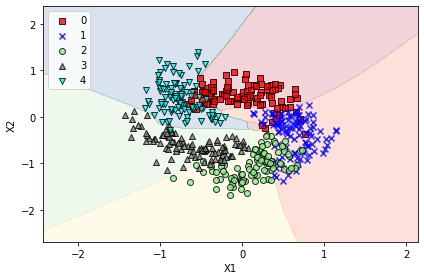

In [23]:
plot_decision_regions(X=np_data, y=Y_encoded,orgin_y=label, classifier=model)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()